# Description

Craigslist is the world's largest collection of used vehicles for sale,this dataset which includes every used vehicle entry within the United States on Craigslist.

# Importing Libraries

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Reading Data

In [32]:
df=pd.read_csv(r"C:\Users\Garvit Thakan\Desktop\VPP\vehicles.csv")

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [34]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [35]:
df.shape

(423857, 25)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

# Data cleaning 

In [37]:
r=df.columns
for i in r:
    print(df[i].value_counts())

7184791621    1
7194329361    1
7194912790    1
7185506469    1
7185509110    1
             ..
7196664431    1
7196664662    1
7196665504    1
7196665569    1
7195109037    1
Name: id, Length: 423857, dtype: int64
https://duluth.craigslist.org/ctd/d/duluth-2000-gmc-new-sierra-1500-ext-cab/7184791621.html           1
https://boston.craigslist.org/gbs/ctd/d/belmont-jeep-wrangler-4x4-sahara-2dr/7194329361.html          1
https://orangecounty.craigslist.org/ctd/d/buena-park-2016-lexus-es-350-skug-sedan/7194912790.html     1
https://cincinnati.craigslist.org/ctd/d/camp-dennison-2014-audi-a4/7185506469.html                    1
https://cincinnati.craigslist.org/ctd/d/cincinnati-2016-ram-promaster-1500-low/7185509110.html        1
                                                                                                     ..
https://portland.craigslist.org/mlt/ctd/d/portland-2016-ford-escape-4x4-4wd-se-suv/7196664431.html    1
https://portland.craigslist.org/clc/ctd/d/portland-2015-l

Based on above observation the features which are too common or of no use like url can be dropped

In [38]:
df= df.drop(columns=['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region'], axis=1)

In [39]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [40]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


# Handling outliers

Lets see if any outliers in Target variable as we remove them the model can be more accurate because they cause a bring a lot of difference in values of mean and SD.

the difference between 75% value and max value is too large so lets leave 10% values at both ends of a distribution

In [41]:
rr=sorted(df["price"])

In [42]:
quantile1, quantile3= np.percentile(rr,[10,90])

In [43]:
print(quantile1,quantile3)

389.6000000000058 31500.0


In [44]:
df=df[(df.price < 31500) & (df.price >= 389 )]
df.shape

(339091, 15)

Lets observe the odometer column

In [45]:
r=sorted(df["odometer"])
r

[23772.0,
 45431.0,
 48932.0,
 49858.0,
 76202.0,
 86942.0,
 88000.0,
 90112.0,
 90821.0,
 92800.0,
 102000.0,
 102462.0,
 103000.0,
 113000.0,
 116711.0,
 128000.0,
 143528.0,
 150959.0,
 167783.0,
 nan,
 108124.0,
 125000.0,
 152415.0,
 159000.0,
 160600.0,
 170259.0,
 170684.0,
 178054.0,
 188406.0,
 196913.0,
 208016.0,
 210865.0,
 223470.0,
 254217.0,
 271000.0,
 309621.0,
 nan,
 nan,
 nan,
 299000.0,
 nan,
 nan,
 8000.0,
 15878.0,
 17182.0,
 36000.0,
 52103.0,
 53300.0,
 62000.0,
 65000.0,
 68559.0,
 82000.0,
 91806.0,
 94448.0,
 100460.0,
 130000.0,
 143700.0,
 156559.0,
 167828.0,
 176000.0,
 204496.0,
 229937.0,
 nan,
 110000.0,
 186200.0,
 208453.0,
 225858.0,
 230500.0,
 242613.0,
 262000.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 85000.0,
 nan,
 196000.0,
 260607.0,
 nan,
 500.0,
 15414.0,
 38000.0,
 50000.0,
 56289.0,
 58764.0,
 63000.0,
 64596.0,
 73000.0,
 76164.0,
 85122.0,
 85556.0,
 87000.0,
 87742.0,
 92000.0,
 104897.0,
 104898.0,
 105000.0,
 105880.0

There are nan values and only one 0 value

In [46]:
df["odometer"].isna().sum()

123166

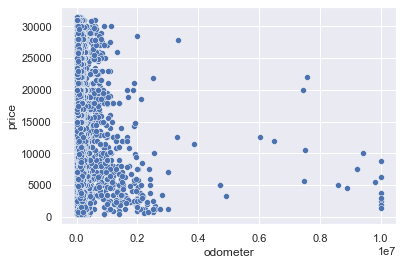

In [47]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

In [48]:
df["odometer"].max()

10000000.0

In [49]:
df.drop(df[df["odometer"]==64809218.0].index,inplace=True)

In [50]:
df.drop(df[df["odometer"]==0.0].index,inplace=True)

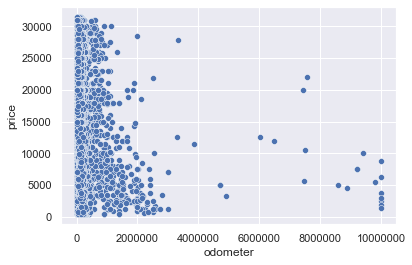

In [51]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [52]:
df["odometer"].isna().sum()

123166

here the values above 3000000  can be considered as outliers

In [53]:
df=df[(df.odometer < 3000000)]

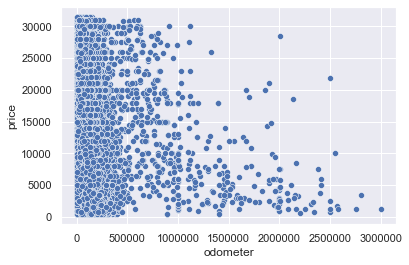

In [54]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Now lets see year column

In [55]:
df["odometer"].isna().sum()

0

In [56]:
df["year"].isna().sum()

556

the null values in a year column cannot be replaced so lets eliminate them

In [57]:
df["year"].min()

1919.0

we must alo drop this 0 values

In [58]:
df.drop(df[df["year"]==0.0].index,inplace=True)

In [59]:
df=df.dropna(subset=['year'])

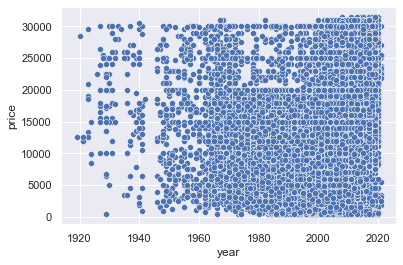

In [60]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [61]:
df=df[(df.year > 1940)]

we have removed outliers from all three numerical columns .
now lets how we can remove with nan values if any.

# Handling Null Values

I am taking out % of null values in each column

In [62]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13772600,64.236
condition,8363900,39.009
cylinders,6944300,32.388
paint_color,5162100,24.076
drive,4964100,23.153
type,4078400,19.022
manufacturer,663900,3.096
model,166100,0.775
fuel,150900,0.704
title_status,117100,0.546


In [63]:
df.condition.value_counts()

excellent    62820
good         50523
like new     11915
fair          4827
new            370
salvage        313
Name: condition, dtype: int64

the misssing values in the condition can be found using odometer as mileage affects condition of car.

what i am trying to do here is finding mean value of odometer readings grouping by there conditions

In [64]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [65]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 83059.2
Excellent average odometer: 110880.1
Good average odometer: 119035.99
Fair average odometer: 183139.5
Salvage average odometer: 168979.51


these are mean values regarding each condition.

now these can be used to group the odometer readings which have nan values in condition.

In [66]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

the values are being filled by the values from above calculated mean value ranges

In [67]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [68]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13772600,64.236
cylinders,6944300,32.388
paint_color,5162100,24.076
drive,4964100,23.153
type,4078400,19.022
manufacturer,663900,3.096
model,166100,0.775
fuel,150900,0.704
title_status,117100,0.546
transmission,88800,0.414


I am droping the null values with less then 5% nan.

In [69]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])

I am also droping the columns with more then 30% null values.
but cylinders can be important feature .

In [70]:
df=df.drop(["size"],axis=1)

In [71]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)


,null,percent
cylinders,6544000,32.190
paint_color,4892900,24.068
drive,4666100,22.953
type,3846700,18.922
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [72]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')

In [73]:
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [74]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            3
paint_color     0
state           0
dtype: int64

In [75]:
df=df.dropna(subset=['cylinders','type'])

In [76]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

# Exploratory Data Analysis

In [77]:
from scipy import stats

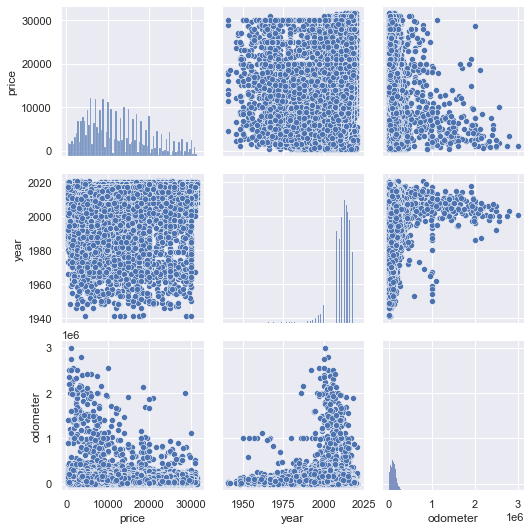

In [79]:
sns.pairplot(df)

The above were relation between numerical values of the table.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203288 entries, 4 to 423856
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         203288 non-null  int64  
 1   year          203288 non-null  float64
 2   manufacturer  203288 non-null  object 
 3   model         203288 non-null  object 
 4   condition     203288 non-null  object 
 5   cylinders     203288 non-null  object 
 6   fuel          203288 non-null  object 
 7   odometer      203288 non-null  float64
 8   title_status  203288 non-null  object 
 9   transmission  203288 non-null  object 
 10  drive         203288 non-null  object 
 11  type          203288 non-null  object 
 12  paint_color   203288 non-null  object 
 13  state         203288 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 31.3+ MB


In [81]:
c=df.columns
for i in c:
    print(df[i].value_counts())

7995     2595
8995     2523
6995     2385
9995     2372
5995     2241
         ... 
4906        1
9220        1
28295       1
16312       1
9584        1
Name: price, Length: 9849, dtype: int64
2017.0    17493
2013.0    15158
2014.0    14567
2015.0    13649
2012.0    13545
          ...  
1951.0        8
1954.0        7
1952.0        4
1947.0        3
1942.0        1
Name: year, Length: 78, dtype: int64
ford               35637
chevrolet          28275
toyota             17338
honda              13868
nissan             12525
jeep                9162
dodge               8036
gmc                 7116
hyundai             6439
subaru              6344
bmw                 5496
ram                 5478
volkswagen          5354
kia                 5135
mercedes-benz       4435
chrysler            4166
buick               3350
mazda               3029
cadillac            2906
lexus               2786
audi                2245
acura               2053
lincoln             1815
infiniti          

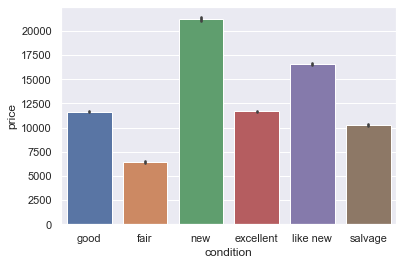

In [82]:
ax = sns.barplot(x="condition", y="price", data=df)

Clearly vehicles with condition  new has highest price as one expects.

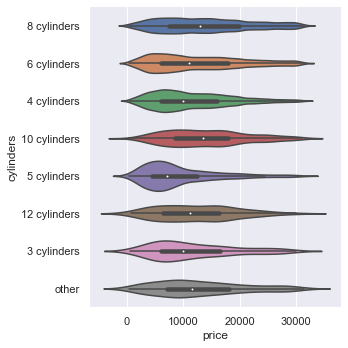

In [83]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

This violinplot provides clear idea about the distribution of number of cylinders and the price.

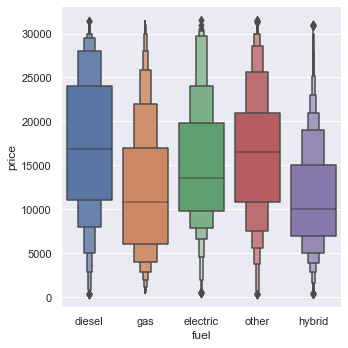

In [84]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

This figure shows the price range between which majority of each type of car based on fuel lies.

Gas=5k-17k

diesel=12k-24k

hybrid=5k-15k

other=10k-21k

electric=10k-20k

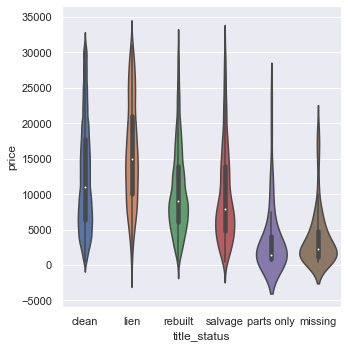

In [85]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

The distribution of price of cars based on title_status can be seen here.

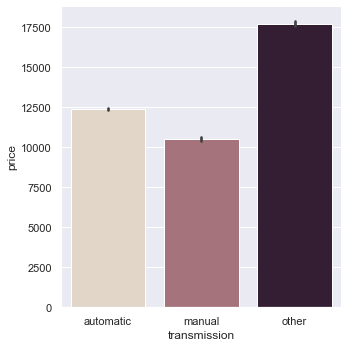

In [86]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

The relation between price and transmission.

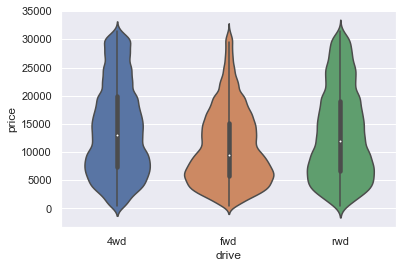

In [87]:
sns.violinplot(x=df.drive, y=df.price);

There doesnt seem too be much difference between the first 2 types of drives .

The third one is a bit different.

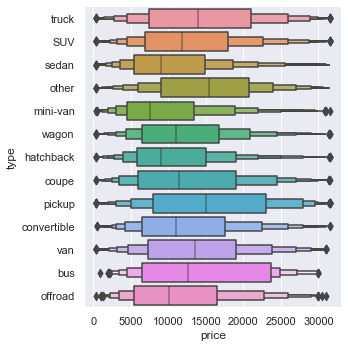

In [88]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

Important observation can be obtained from the above figure regarding the price bracket for each type of vehicle.

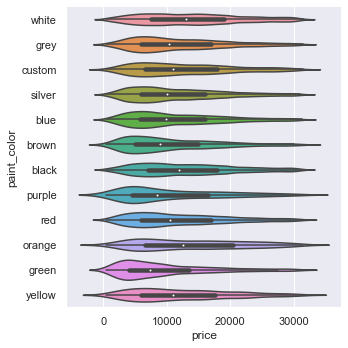

In [89]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

Important observation can be obtained from the above figure regarding the distribution of price bracket for each color of vehicle.

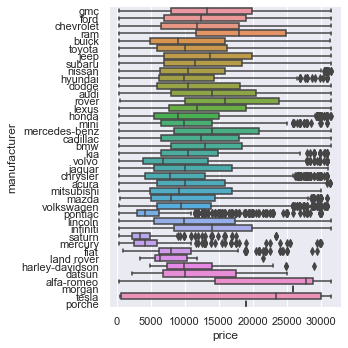

In [90]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

It just gives and idea about prices based on the manufacturer.

#  Label Processing


In [91]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [92]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [93]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

# Split Train and Test data


In [94]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [95]:
y= df.price
X= df.drop('price',axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(162630, 13) (162630,)
(40658, 13) (40658,)


# Training Model

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [99]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [100]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 1902.66
Mean Squared Error: 9521278.61
Root Mean Squared Error: 3085.66
83.12896987832636


The accuracy is 83.01 .